In [193]:
import numpy as np
import imgaug as ia
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import matplotlib.patches as patches

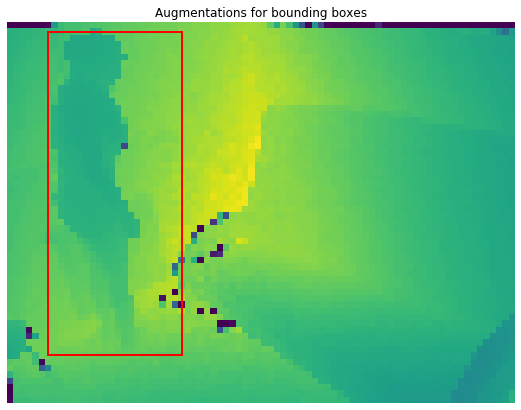

In [257]:
image = np.load('/home/mathurin/prudence/fusion/Serie27/Array/thermal_depth17.npy')
mean = np.mean(image, axis=(0,1))
std = np.std(image, axis=(0,1))

# Standardization
image = (image-mean)/std
image = image.astype('float32')
depth_image = image[:, :, 0]
thermal_image = image[:, :, 1]

bbox = (6,1,22,57)
w = bbox[2] - bbox[1]
h = bbox[3] - bbox[0]

bbs = BoundingBox(6,1,22,57)



image_stack = [depth_image, thermal_image]

# Create a Rectangle patch
rect = patches.Rectangle((bbox[0],bbox[1]),w,h,linewidth=2,edgecolor='r',facecolor='none')

fig, ax = plt.subplots(figsize=(10, 7))
ax.axis('off')
plt.title('Augmentations for bounding boxes')
ax.imshow(depth_image)
ax.add_patch(rect)



In [216]:
# initialize the augmenters for demo
rotate = iaa.Affine(rotate=(-25, 25)) # rotate image
gaussian_noise = iaa.AdditiveGaussianNoise(scale=0.1*np.max(depth_image)) # add gaussian noise
crop = iaa.Crop(percent=(0, 0.4)) # crop image
#hue = iaa.AddToHueAndSaturation((-60, 60))  # change their color
#elastic_trans = iaa.ElasticTransformation(alpha=90, sigma=9) # water-like effect
#coarse_drop = iaa.CoarseDropout((0.01, 0.1), size_percent=0.01)# set large image areas to zero

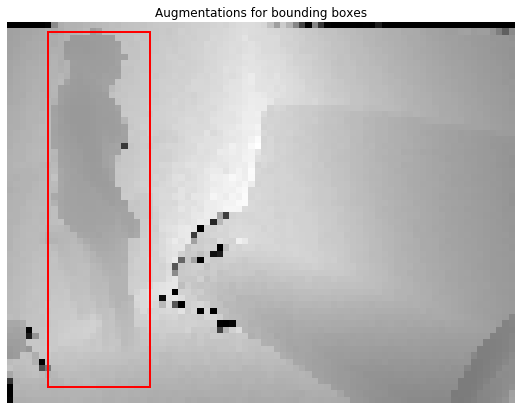

In [331]:
augmenters = [iaa.Affine(rotate=(-25, 25)),
              iaa.AdditiveGaussianNoise(scale=0.1*np.max(depth_image)),
              iaa.Crop(percent=(0, 0.2)),
              iaa.ElasticTransformation(alpha=90, sigma=9),
              iaa.CoarseDropout((0.01, 0.1), size_percent=0.01)]
seq = iaa.SomeOf((0, 2), augmenters, random_order=True)              
image_aug, bbs_aug = seq(image = depth_image, bounding_boxes=bbs)

rect = patches.Rectangle((bbs_aug.x1,bbs_aug.y1), bbs_aug.x2-bbs_aug.x1, bbs_aug.y2-bbs_aug.y1,linewidth=2,edgecolor='r',facecolor='none')
fig, ax = plt.subplots(figsize=(10, 7))
ax.axis('off')
plt.title('Augmentations for bounding boxes')
ax.imshow(image_aug, cmap='gray')
ax.add_patch(rect)

#TODO
# si le crop est trop important, ne pas prendre en compte la bounding box
# amoindrir l'effet Elastic transformation
# coarsdrop : amoindrir l'effet
# ajouter des effets
